In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# sklearn.decomposition.PCA
- 클래스 원형
```
class sklearn.decomposition.PCA(
  n_components=None, *, copy=True, whiten=False, svd_solver='auto', 
  tol=0.0, iterated_power='auto', n_oversamples=10, 
  power_iteration_normalizer='auto', random_state=None
)
```

## 주요 파라미터
- n_components: 모든 구성요소가 그대로 유지(default=None)
  - 정수: 축소할 구성요소의 수
  - 실수: 축소할 최대 분산(0~1)

## 주요 속성
- components: 데이터의 최대 분산을 나타내는 주성분 배열
- explain_variance_: 선택한 각 성분이 설명하는 분산의 양
  - PCA는 분산 설명력이 가장 높은 변수부터 내림차순 정렬
- explain_variance_ratio: 선택한 각 성분의 분산의 백분율
- singular_values_: 특이값

## 예제

In [2]:
from sklearn.decomposition import PCA

In [8]:
x = np.array([
  [-1, -1], 
  [-2, -1], 
  [-3, -2], 
  [1, 1], 
  [2, 1], 
  [3, 2]
])
pca = PCA(n_components=2)
pca.fit(x)

print(pca.n_components_)
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.singular_values_)

2
[0.99244289 0.00755711]
[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]
[6.30061232 0.54980396]


In [9]:
# 차원 축소 적용
pca.transform(x)

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

# sklearn.discriminant_analysis.LinearDiscriminantAnalysis
- 선형판별분석
  - 데이터 분포를 학습해 결정경계를 만들어 데이터를 분류하는 모델 또는 차원 축소(동시에 사용이 가능)
  - 저차원 공간으로 투영한다는 측면에서는 PCA와 동일(지도학습기법)
  - PCA는 비지도 학습에 사용


- 클래스 원형
```
class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(
  solver='svd', shrinkage=None, priors=None, n_components=None, 
  store_covariance=False, tol=0.0001, covariance_estimator=None
)
```

## 주요 파라미터
- solver: svd(default) - 특이값 분해
  - lsqr: 최소제곱해 축소
  - eigen: 고유값 분해 축소
- n_components: 차원 축소를 위한 변수의 수

## 주요 속성
- covariace_: 공분산 행렬
- explained_variance_ratio_: 선택한 각 성분의 분산의 백분율
- classes_: 분류된 클래스 레이블

## 예제

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
x = np.array([
  [-1, -1], 
  [-2, -1], 
  [-3, -2], 
  [1, 1], 
  [2, 1], 
  [3, 2]
])
y = np.array([1, 1, 1, 2, 2, 2])

In [13]:
clf = LinearDiscriminantAnalysis()
clf.fit(x, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# 붗꽃 분류

In [34]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [15]:
iris = load_iris()
x = iris.data
y = iris.target

In [18]:
x_scale = StandardScaler().fit_transform(x)
print( x_scale )

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## PCA를 통한 차원축소

In [20]:
pca = PCA(n_components=0.9)
pca.fit(x_scale)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# 변수 2개면 전체 분산의 90% 이상 설명이 가능
print( pca.explained_variance_ratio_ )
print( np.cumsum(pca.explained_variance_ratio_) )

[0.72962445 0.22850762]
[0.72962445 0.95813207]


In [25]:
# 차원축소 적용
x_scale_pca = pca.transform(x_scale)
x_scale_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

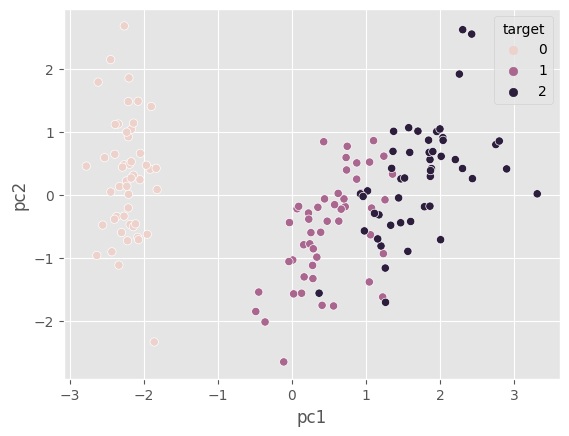

In [33]:
df = pd.DataFrame( x_scale_pca, columns=['pc1', 'pc2'] )
df['target'] = y

sns.scatterplot(data=df, x='pc1', y='pc2', hue='target' )
plt.show()

In [38]:
model = SVC()

params = dict(
  C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
  gamma = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
)

search = GridSearchCV( model, param_grid=params, cv=10 ).fit( x_scale_pca, y )

In [39]:
print( search.best_score_, search.best_params_ )

0.92 {'C': 100.0, 'gamma': 0.1}


## LDA를 통한 차원 축소 및 분류 모델 생성

In [47]:
lda = LinearDiscriminantAnalysis( n_components=2 )

In [48]:
# 지도학습 기반이기 때문에 정답이 함께 있어야 한다.
lda.fit( x_scale, y )

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [49]:
# 변수 하나만 으로도 전체 분산이 설명이 가능
print( lda.explained_variance_ratio_ )
print( np.cumsum( lda.explained_variance_ratio_) )

[0.9912126 0.0087874]
[0.9912126 1.       ]


In [51]:
x_scale_lda = lda.transform(x_scale)
x_scale_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

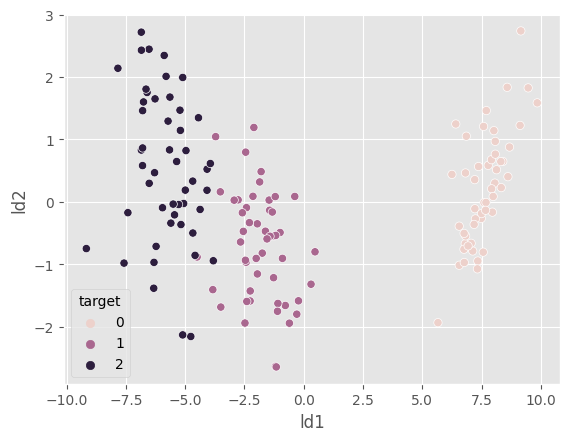

In [53]:
df = pd.DataFrame( x_scale_lda, columns=['ld1', 'ld2'] )
df['target'] = y

sns.scatterplot(data=df, x='ld1', y='ld2', hue='target' )
plt.show()

In [54]:
model = SVC()

params = dict(
  C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
  gamma = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
)

search = GridSearchCV( model, param_grid=params, cv=10 ).fit( x_scale_lda, y )

In [55]:
print( search.best_score_, search.best_params_ )

0.9866666666666667 {'C': 0.0001, 'gamma': 0.0001}
